<a href="https://colab.research.google.com/github/Anirudh1905/Data_Analytics/blob/master/dummy_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm 
import statsmodels.api as s
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/dummy2.xlsx')
data

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'SIMPLE LINEAR REGRESSION')

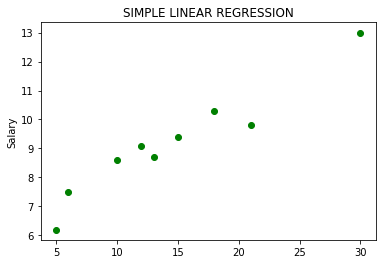

In [5]:
plt.scatter(data['Experience'],data['Salary'],color='green')
plt.ylabel('Salary')
plt.title('SIMPLE LINEAR REGRESSION')

In [6]:
from statsmodels.formula.api import ols
reg1=ols(formula='Salary ~ Experience',data=data).fit()
reg1.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.30e-05
Time:                        18:35:42   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
Experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

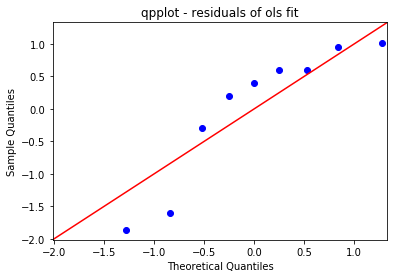

In [7]:
res=reg1.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qpplot - residuals of ols fit')

In [9]:
just_dummies=pd.get_dummies(data['Gender'])
step_1=pd.concat([data,just_dummies],axis=1)
step_1.drop(['Gender','Female'],inplace=True,axis=1)
step_1

,Employee,Salary,Experience,Male
0,1,7.5,6,1
1,2,8.6,10,1
2,3,9.1,12,1
3,4,10.3,18,1
4,5,13.0,30,1
5,6,6.2,5,0
6,7,8.7,13,0
7,8,9.4,15,0
8,9,9.8,21,0


In [11]:
result=s.OLS(step_1['Salary'],s.add_constant(step_1[['Experience','Male']])).fit()
result.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.80e-05
Time:                        18:42:12   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4595      0.280     19.486      0.000       4.774       6.145
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
Male           0.7890      0.238      3.309      0.016       0.206       1.372
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""